 #                                                     PROJET_ALVARES_DATAVISUALISATION

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
# Charger le jeu de données
chemin_fichier = 'Electronic_sales_Sep2023-Sep2024.csv'
donnees = pd.read_csv(chemin_fichier)

## Présentation du Dataset :

Mon dataset contient des informations détaillées sur les ventes électroniques d'une entreprise X de septembre 2023 à septembre 2024, avec des colonnes sur :

-Les informations client (ID, âge, genre, statut de fidélité)

-Le type de produit (type de produit, SKU, évaluation)

-Les détails de commande (statut, méthode de paiement, prix total, prix unitaire, quantité)

-La date d'achat , type d'expédition, et les ajouts supplémentaires achetés

In [7]:
print(donnees)

       Customer ID  Age  Gender Loyalty Member Product Type      SKU  Rating  \
0             1000   53    Male             No   Smartphone  SKU1004       2   
1             1000   53    Male             No       Tablet  SKU1002       3   
2             1002   41    Male             No       Laptop  SKU1005       3   
3             1002   41    Male            Yes   Smartphone  SKU1004       2   
4             1003   75    Male            Yes   Smartphone  SKU1001       5   
...            ...  ...     ...            ...          ...      ...     ...   
19995        19996   27  Female             No   Smartphone   SMP234       4   
19996        19996   27  Female            Yes       Laptop   LTP123       4   
19997        19996   27  Female             No   Headphones   HDP456       4   
19998        19997   27    Male             No   Headphones   HDP456       1   
19999        19998   27     NaN            Yes       Laptop   LTP123       4   

      Order Status Payment Method  Tota

In [32]:
#print(donnees)
donnees['Loyalty Member'] 

lm = donnees['Loyalty Member'] 
lm.head()

0     No
1     No
2     No
3    Yes
4    Yes
Name: Loyalty Member, dtype: object

## INTRODUCTION

### Angle d'analyse :

-Audience : Équipe commerciale ou marketing.

-Objectif : Identifier les produits les plus performants, analyser le comportement d'achat selon les segments clients (âge, genre, fidélité).

Problématique : Quels sont les principaux facteurs qui influencent les ventes et la fidélité des clients ?

###  les Etapes d'analyse: 

qui nous permettent de répondre à notre problématiques : Nous allons passer des étapes spécifiques pour identifier les facteurs qui influencent les ventes et la fidélité des clients. 

Voici trois étapes que nous allons explorer :

1.Trouver quels sont les produits les plus populaires ?

2.Comprendre Comment la fidélité des clients influence-t-elle les ventes ?

3.Trouver Quels modes de paiement sont les plus utilisés, et y a-t-il un lien avec le statut des commandes (complétées ou annulées) ?

## 1.Trouver quels sont les produits les plus populaires ?

C:\Users\thier\AppData\Local\Temp\ipykernel_109092\496745467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=donnees['Product Type'].index, x=donnees['Product Type'].values, palette="viridis")


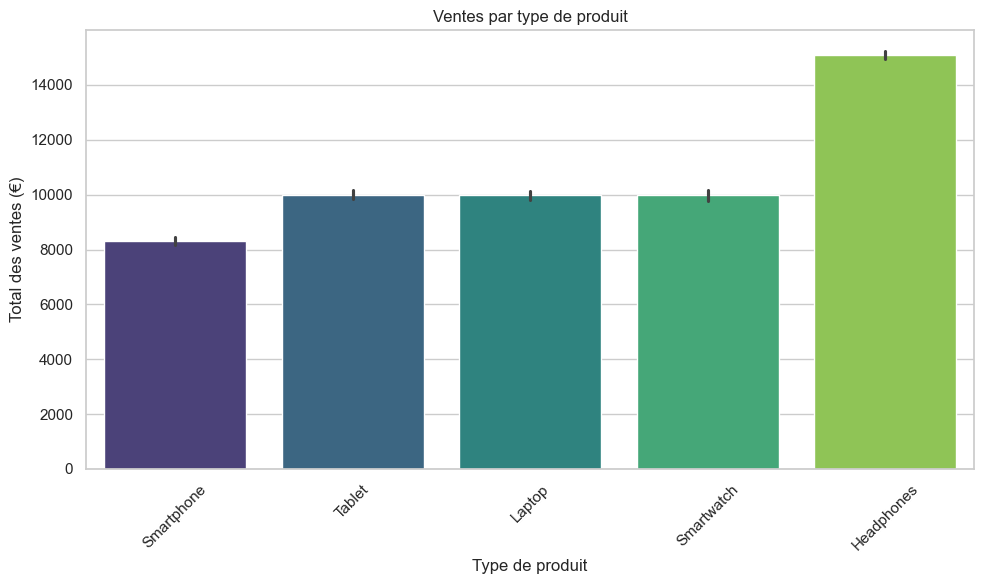

In [9]:
# Graphique 1 : Ventes par type de produit avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(y=donnees['Product Type'].index, x=donnees['Product Type'].values, palette="viridis")
plt.title('Ventes par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Total des ventes (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Montant total des ventes par type de produit :

Les écouteurs ont le montant total des ventes le plus élevé, indiquant une forte contribution au chiffre d'affaires global. Cependant, cela ne signifie pas nécessairement qu'ils sont les produits les plus populaires en termes de quantité.

Les tablettes, ordinateurs portables et smartwatchs suivent en termes de chiffre d'affaires, avec des montants de ventes similaires. Cela indique une bonne performance pour ces produits, mais ils ne surpassent pas les écouteurs en valeur totale.

C:\Users\thier\AppData\Local\Temp\ipykernel_124492\3493242236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  quantity_plot = sns.barplot(x=sales_quantity.index, y=sales_quantity.values, palette="viridis")


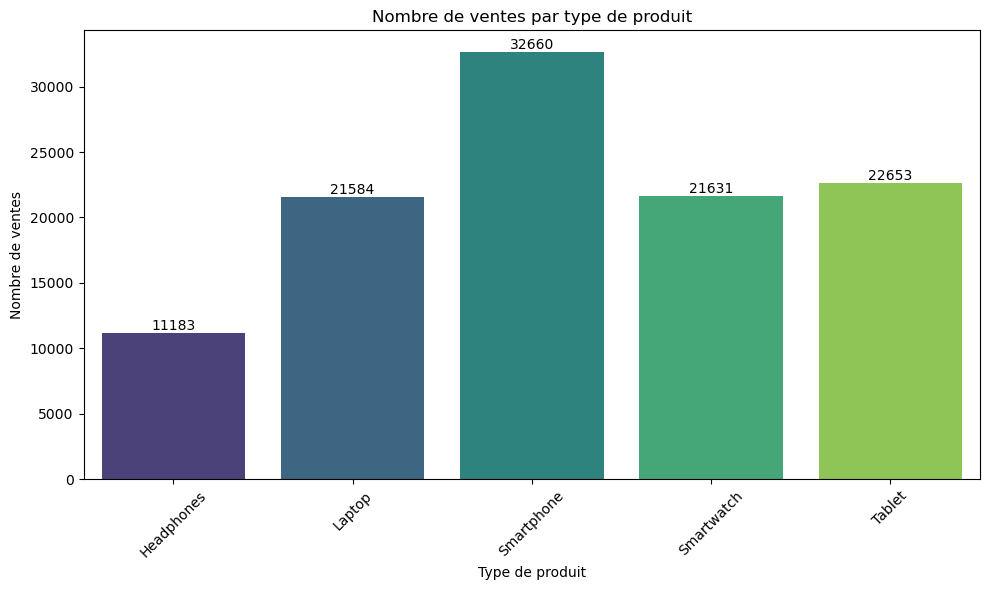

In [11]:
# Calcul du nombre de ventes par type de produit
sales_quantity = donnees.groupby('Product Type')['Quantity'].sum()

# Graphique du nombre de ventes par type de produit
plt.figure(figsize=(10, 6))
quantity_plot = sns.barplot(x=sales_quantity.index, y=sales_quantity.values, palette="viridis")
plt.title('Nombre de ventes par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=45)

# Ajouter des annotations pour les valeurs
for index, value in enumerate(sales_quantity.values):
    quantity_plot.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Nombre de ventes par type de produit :

Contrairement au montant total, les smartphones et les tablettes sont les produits avec les plus grandes quantités vendues. Cela suggère qu'ils sont particulièrement populaires, probablement en raison de leur accessibilité ou de leur prix attractif.

Les écouteurs ont un nombre de ventes bien inférieur par rapport aux smartphones et aux tablettes, ce qui signifie que leur chiffre d'affaires élevé est principalement dû à un prix unitaire plus élevé, et non à un volume important de ventes.

### L'analyse combinée révèle plusieurs insights importants :

Les écouteurs se démarquent comme un produit à haute valeur unitaire, contribuant fortement aux revenus malgré un nombre de ventes inférieur. Cela en fait un produit premium ou de luxe qui attire un certain segment de clientèle.

Les smartphones et les tablettes, bien que générant moins de revenus unitaires, sont populaires en volume. Cela peut indiquer qu'ils sont perçus comme des produits accessibles ou essentiels, attirant un large public.

Les ordinateurs portables et montres connectées montrent une balance équilibrée entre le nombre de ventes et le chiffre d'affaires. Ils sont modérément populaires et contribuent de manière stable aux revenus.

## 2.Comprendre Comment la fidélité des clients influence-t-elle les ventes ?

In [42]:
loyalty_sales = donnees.groupby('Loyalty Member')['Total Price'].sum()

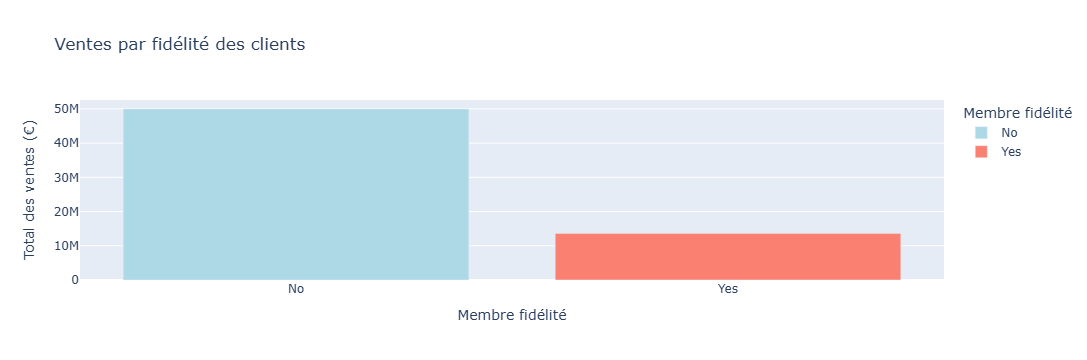

In [44]:
# Graphique 2 : Ventes par fidélité des clients avec Plotly
fig_loyalty_sales = px.bar(
    loyalty_sales.reset_index(),                  # Convertit la série 'loyalty_sales' en DataFrame pour une utilisation dans Plotly
    x='Loyalty Member',                           # Définit l'axe des x sur le statut de fidélité (Oui/Non)
    y='Total Price',                              # Définit l'axe des y sur le montant total des ventes
    title="Ventes par fidélité des clients",      # Titre du graphique
    labels={'Loyalty Member': 'Membre fidélité',  # Personnalise l'étiquette de l'axe x
            'Total Price': 'Total des ventes (€)'},  # Personnalise l'étiquette de l'axe y
    color='Loyalty Member',                       # Colore les barres en fonction de la fidélité des clients
    color_discrete_map={'No': 'lightblue', 'Yes': 'salmon'}  # Définit une couleur spécifique pour chaque valeur de fidélité
)
fig_loyalty_sales.update_layout(
    xaxis_title="Membre fidélité",                # Titre de l'axe des x
    yaxis_title="Total des ventes (€)"            # Titre de l'axe des y
)
fig_loyalty_sales.show()                          # Affiche le graphique



### Ventes par fidélité des clients :

Les clients non-membres représentent la majorité des ventes, bien plus que les membres fidèles. Cela pourrait indiquer que le programme de fidélité n’est pas suffisamment attractif pour inciter les clients à s’y inscrire ou qu’il n’influence pas de manière significative les achats.

C:\Users\thier\AppData\Local\Temp\ipykernel_124492\930387864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_loyalty.index, y=total_sales_by_loyalty.values, palette="coolwarm")


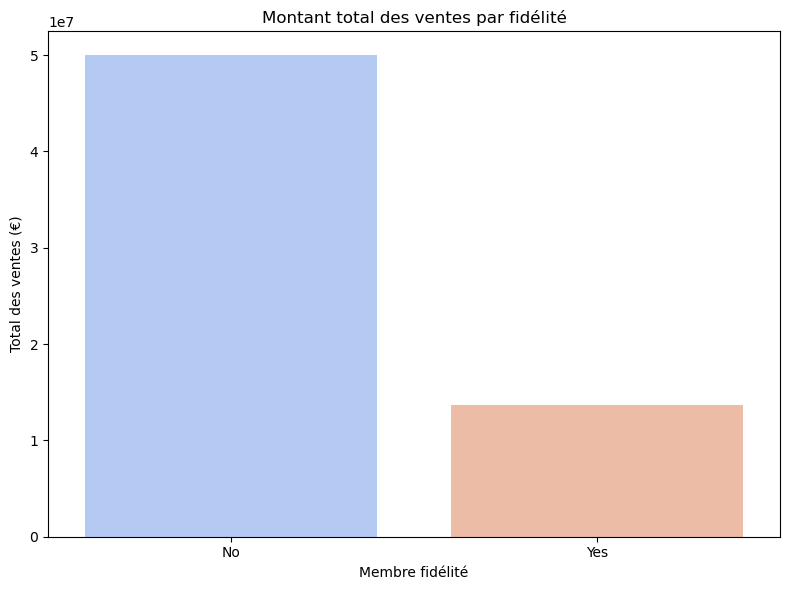

C:\Users\thier\AppData\Local\Temp\ipykernel_124492\930387864.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_sales_by_loyalty.index, y=quantity_sales_by_loyalty.values, palette="coolwarm")


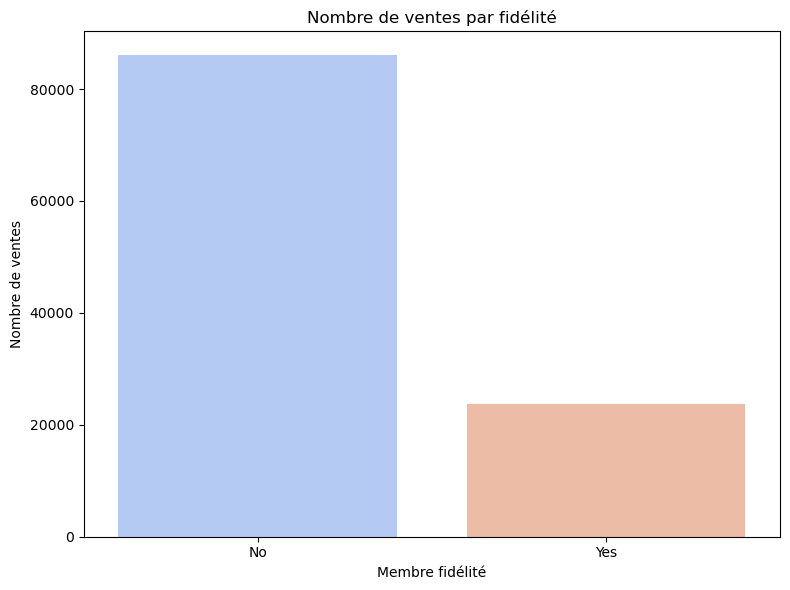

C:\Users\thier\AppData\Local\Temp\ipykernel_124492\930387864.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sales_by_loyalty.index, y=average_sales_by_loyalty.values, palette="coolwarm")


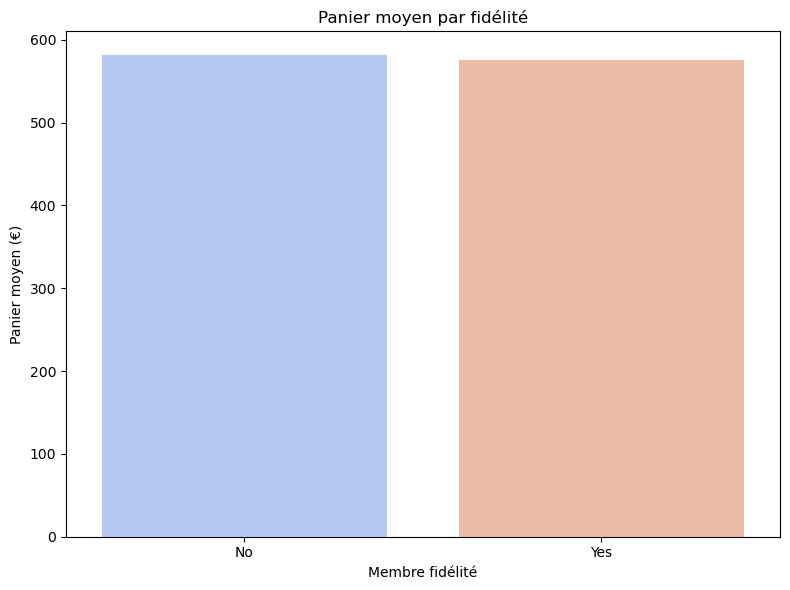

In [24]:
# Calcul du montant total des ventes par fidélité
total_sales_by_loyalty = donnees.groupby('Loyalty Member')['Total Price'].sum()

# Calcul du nombre de ventes par fidélité
quantity_sales_by_loyalty = donnees.groupby('Loyalty Member')['Quantity'].sum()

# Calcul du panier moyen (montant moyen par vente) par fidélité
average_sales_by_loyalty = total_sales_by_loyalty / quantity_sales_by_loyalty

# Graphique du montant total des ventes
plt.figure(figsize=(8, 6))
sns.barplot(x=total_sales_by_loyalty.index, y=total_sales_by_loyalty.values, palette="coolwarm")
plt.title("Montant total des ventes par fidélité")
plt.xlabel("Membre fidélité")
plt.ylabel("Total des ventes (€)")
plt.tight_layout()
plt.show()

# Graphique du nombre de ventes
plt.figure(figsize=(8, 6))
sns.barplot(x=quantity_sales_by_loyalty.index, y=quantity_sales_by_loyalty.values, palette="coolwarm")
plt.title("Nombre de ventes par fidélité")
plt.xlabel("Membre fidélité")
plt.ylabel("Nombre de ventes")
plt.tight_layout()
plt.show()

# Graphique du panier moyen
plt.figure(figsize=(8, 6))
sns.barplot(x=average_sales_by_loyalty.index, y=average_sales_by_loyalty.values, palette="coolwarm")
plt.title("Panier moyen par fidélité")
plt.xlabel("Membre fidélité")
plt.ylabel("Panier moyen (€)")
plt.tight_layout()
plt.show()


### Analyse combinée :

Montant total des ventes : Les non-membres génèrent un montant de ventes bien supérieur, ce qui peut être attribué soit à leur nombre important, soit à une préférence pour effectuer des achats ponctuels sans adhérer au programme de fidélité.

Quantité de ventes : Le nombre de ventes est également plus élevé pour les non-membres, confirmant que les non-membres sont plus nombreux et actifs en termes de volume de transactions.

Panier moyen : La parfaite égalité du panier moyen entre les membres fidèles et les non-membres est un résultat intéressant. Cela indique que, malgré leur adhésion au programme de fidélité, les membres ne dépensent pas plus par transaction que les non-membres. En d'autres termes, le programme de fidélité ne semble pas augmenter significativement le montant moyen des achats individuels.

## 3.Trouver Quels modes de paiement sont les plus utilisés, et y a-t-il un lien avec le statut des commandes (complétées ou annulées) ?

In [41]:
order_status_payment = donnees.groupby(['Payment Method', 'Order Status']).size().unstack()

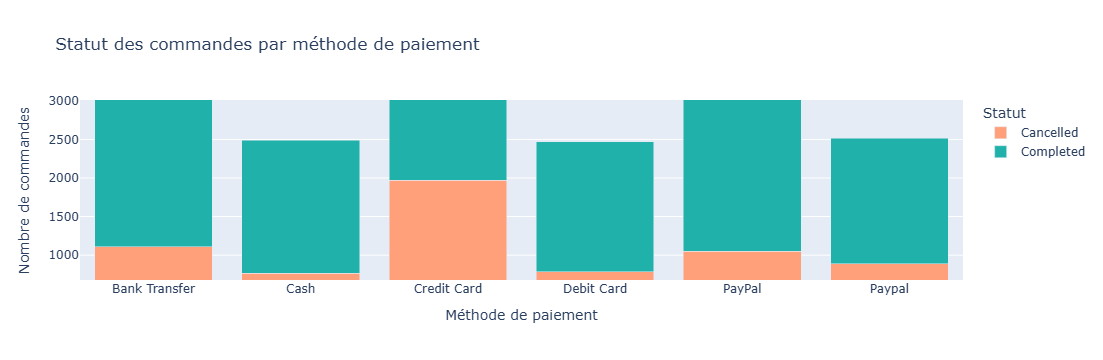

In [45]:
# Graphique 3 : Statut des commandes par méthode de paiement avec Plotly
fig_order_status_payment = px.bar(order_status_payment.reset_index(), x='Payment Method',
                                  y=['Cancelled', 'Completed'],
                                  title="Statut des commandes par méthode de paiement",
                                  labels={'value': 'Nombre de commandes', 'variable': 'Statut'},
                                  color_discrete_sequence=['#FFA07A', '#20B2AA'])
fig_order_status_payment.update_layout(xaxis_title="Méthode de paiement", yaxis_title="Nombre de commandes", barmode='stack')
fig_order_status_payment.show()

### Le troisième graphique (Statut des commandes par méthode de paiement):

montre la répartition des commandes complétées et annulées en fonction de la méthode de paiement. Il est notable que les cartes de crédit ont le plus grand volume de commandes, mais elles comportent également un nombre important d’annulations, ce qui peut être préoccupant. Les paiements en espèces et par carte de débit montrent des taux d'annulation plus faibles, ce qui peut refléter une plus grande assurance de paiement avec ces méthodes.


## recommandations stratégiques finales à adopter: 
Optimiser le Programme de Fidélité : Augmentez les avantages pour les membres et lancez des campagnes pour attirer plus de clients vers le programme. Assurez-vous que les membres perçoivent des bénéfices concrets qui les incitent à dépenser plus.

Différencier les Offres par Produit : Positionnez les écouteurs comme produit premium avec des campagnes de qualité. Pour les produits populaires comme les smartphones et tablettes, proposez des offres groupées ou des promotions pour augmenter le volume de ventes.

Cibler les Offres par Clientèle : Adaptez les promotions en fonction des groupes d’âge et de leurs préférences pour augmenter la pertinence des offres et les taux de conversion.

Suivre les Résultats : Mesurez régulièrement l'impact des changements sur les ventes et ajustez les stratégies en fonction des performances du programme de fidélité et des comportements d’achat.
